## House Price Prediction System

#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [2]:
df = pd.read_csv("Dataset/House_Price_Dataset.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Check Missing Values

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Encode Binary Categorical Columns

In [5]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Encode 'furnishingstatus' Using LabelEncoder

In [6]:
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df['furnishingstatus'].unique()  # 0: furnished, 1: semi-furnished, 2: unfurnished

array([0, 1, 2])

#### Furnishing Status vs Price

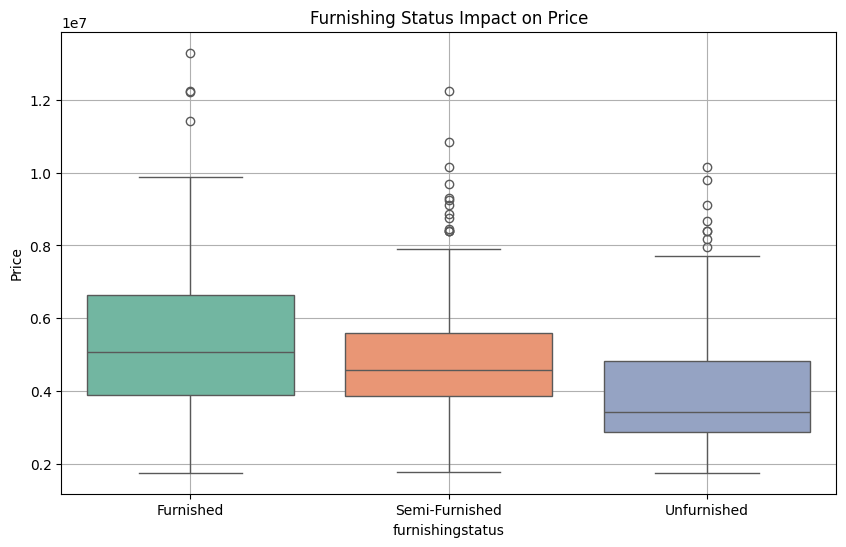

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='furnishingstatus',
    y='price',
    data=df,
    hue='furnishingstatus',   
    palette='Set2',
    dodge=False,             
    legend=False            
)
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Furnished', 'Semi-Furnished', 'Unfurnished']
)
plt.title("Furnishing Status Impact on Price")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#### Correlation Heatmap

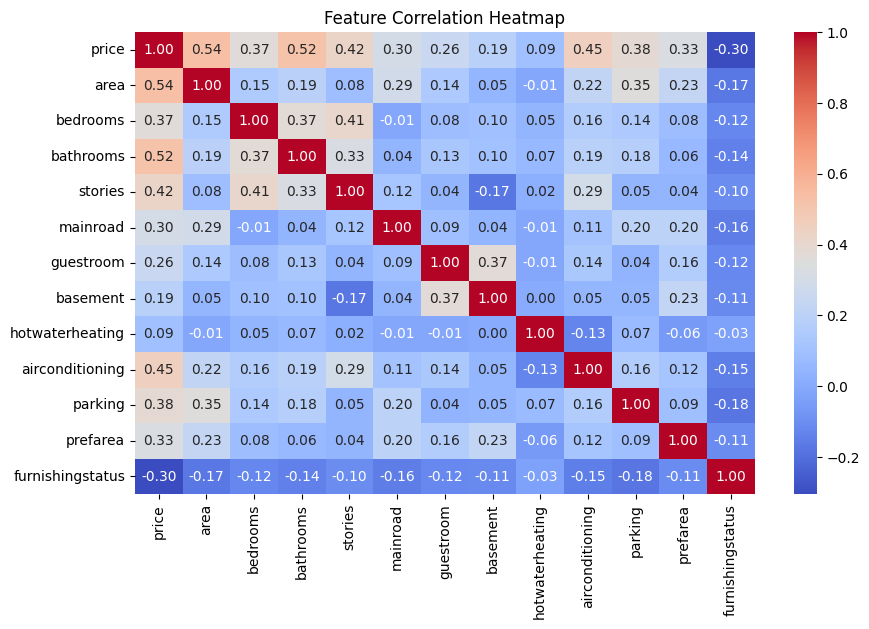

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Feature Distribution Plots

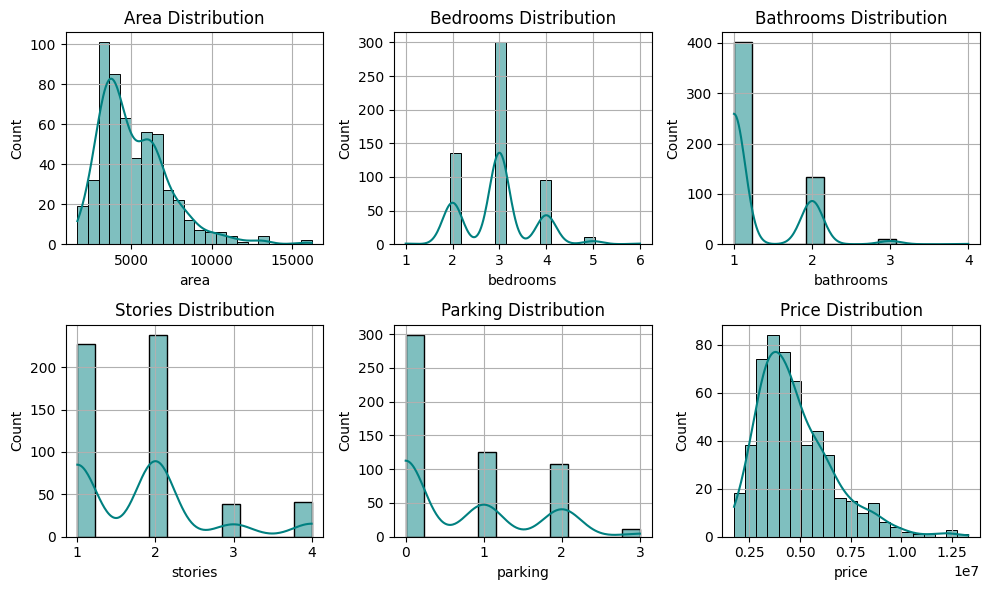

In [9]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"{col.capitalize()} Distribution")
    plt.grid(True)
plt.tight_layout()
plt.show()

#### Boxplot for Outlier Detection

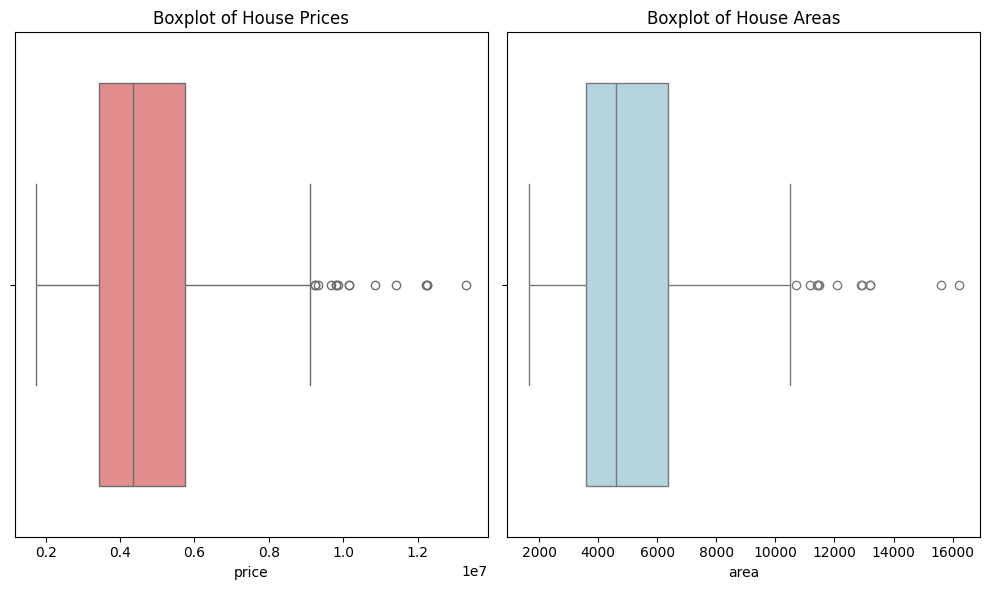

In [10]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='lightcoral')
plt.title("Boxplot of House Prices")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['area'], color='lightblue')
plt.title("Boxplot of House Areas")

plt.tight_layout()
plt.show()

#### Pairplot of Top Features

<Figure size 1000x600 with 0 Axes>

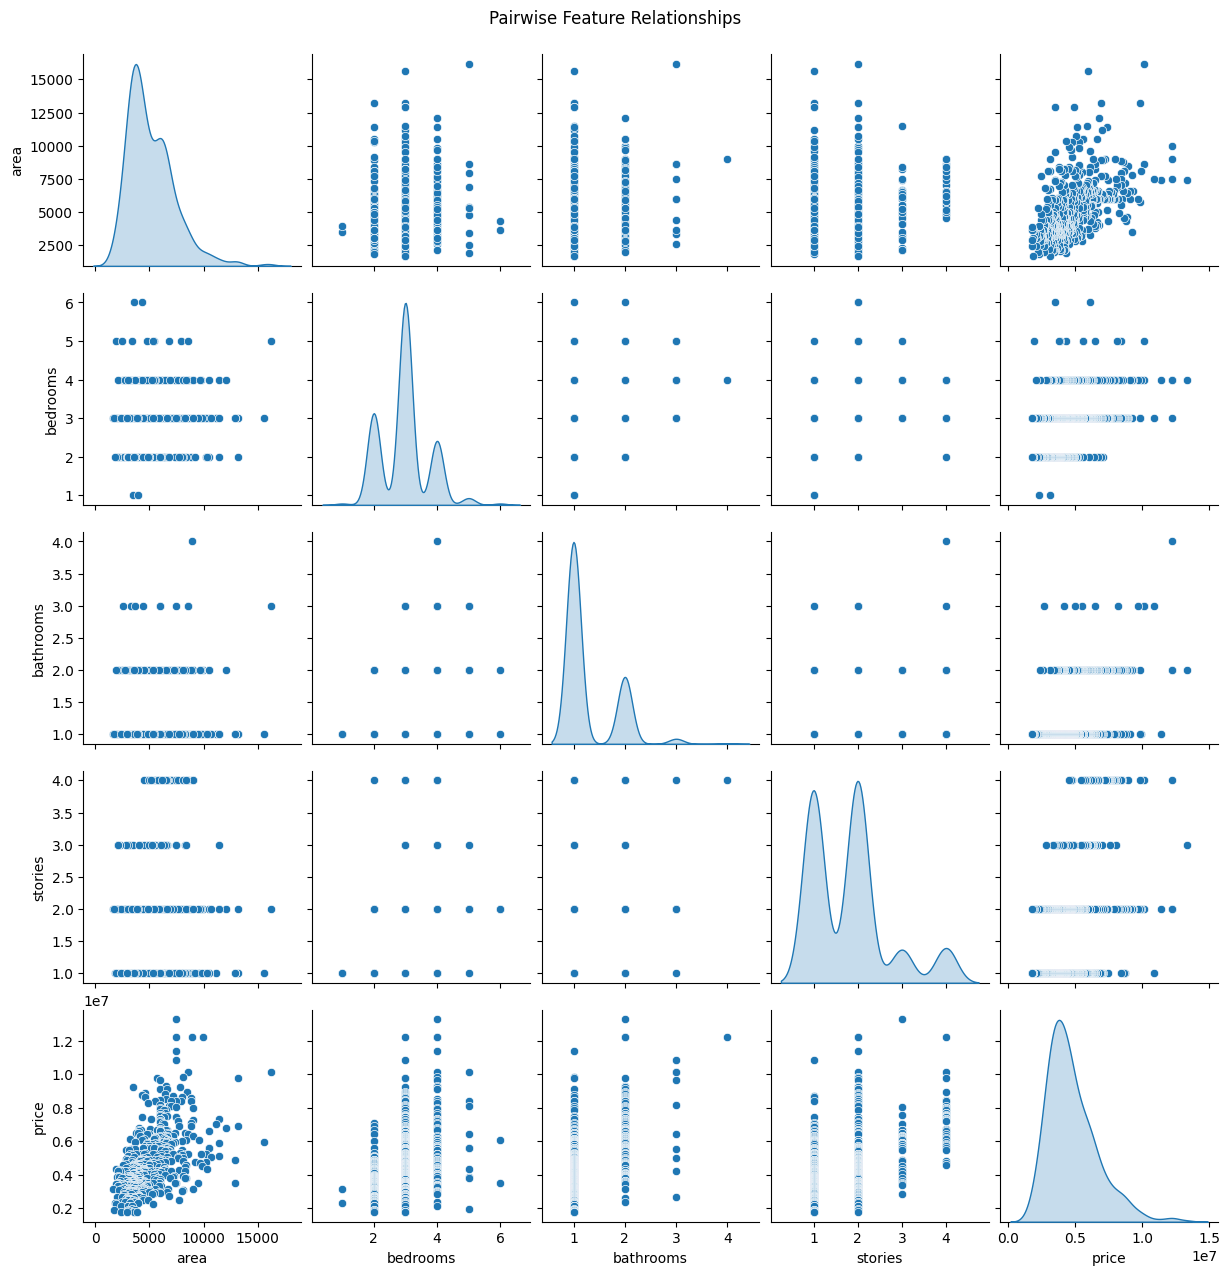

In [11]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['area', 'bedrooms', 'bathrooms', 'stories', 'price']], diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

#### Define Features and Target

In [12]:
X = df.drop('price', axis=1)
y = df['price']

#### Feature Scaling

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Train Linear Regression Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Model Evaluation

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: ₹{mse:,.2f}")
print(f"R² Score: {r2:.4f}")

MSE: ₹1,771,751,116,594.04
R² Score: 0.6495


#### Model Coefficients

In [17]:
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: ₹{coef:,.2f}")

Coefficients:
area: ₹511,355.31
bedrooms: ₹57,939.76
bathrooms: ₹550,762.11
stories: ₹352,072.09
mainroad: ₹127,770.25
guestroom: ₹89,178.01
basement: ₹187,581.88
hotwaterheating: ₹143,909.24
airconditioning: ₹365,086.93
parking: ₹194,330.07
prefarea: ₹267,023.36
furnishingstatus: ₹-160,043.58


#### Coefficient Importance Bar Plot

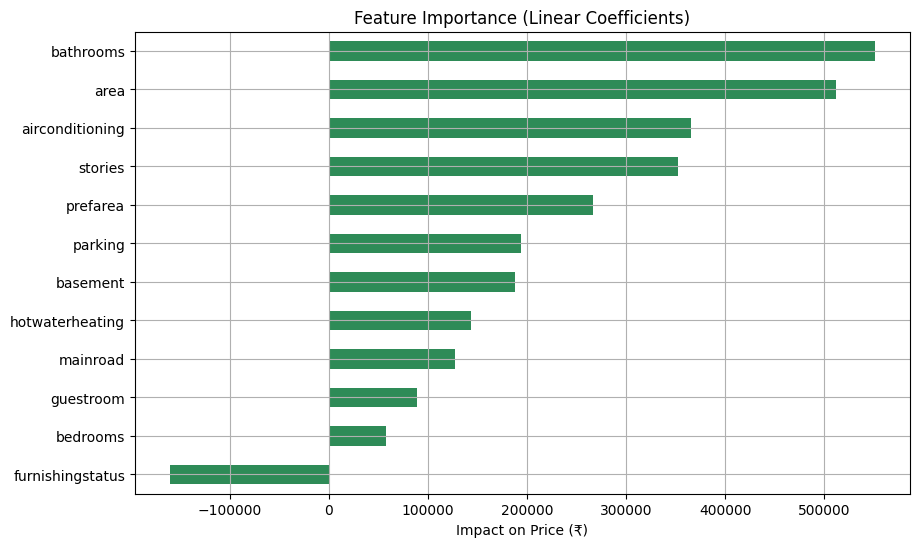

In [18]:
plt.figure(figsize=(10,6))
coefs = pd.Series(model.coef_, index=X.columns)
coefs.sort_values().plot(kind='barh', color='seagreen')
plt.title("Feature Importance (Linear Coefficients)")
plt.xlabel("Impact on Price (₹)")
plt.grid(True)
plt.show()

#### Actual vs Predicted Plot

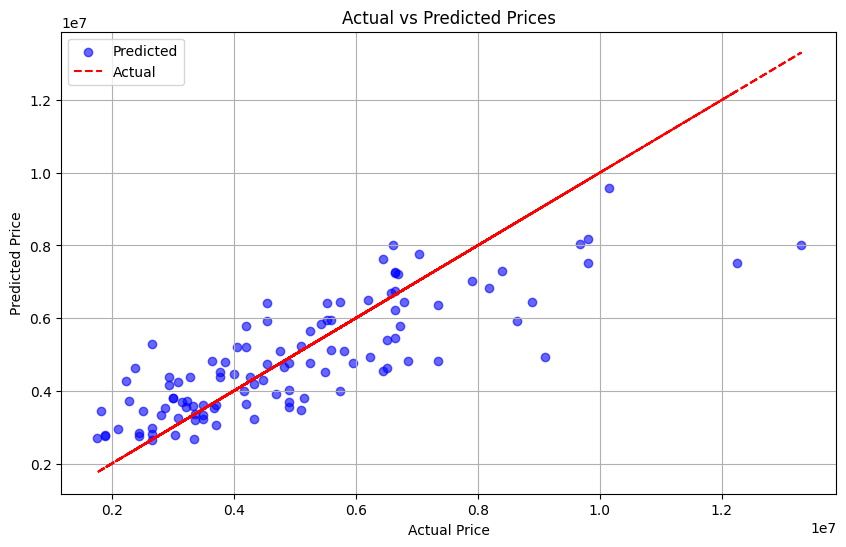

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c='blue', label="Predicted", alpha=0.6)
plt.plot(y_test, y_test, 'r--', label="Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

#### Residuals Plot

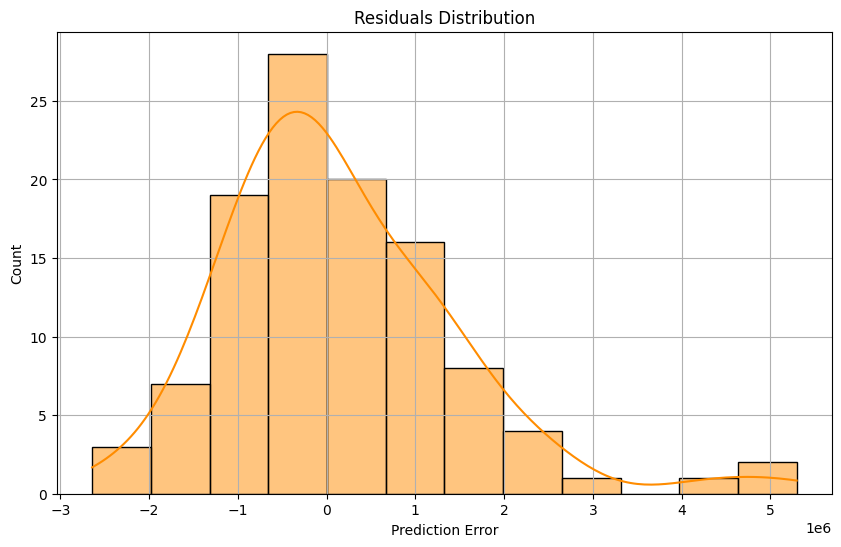

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='darkorange')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()

#### Predicted vs Error Plot (Scatter)

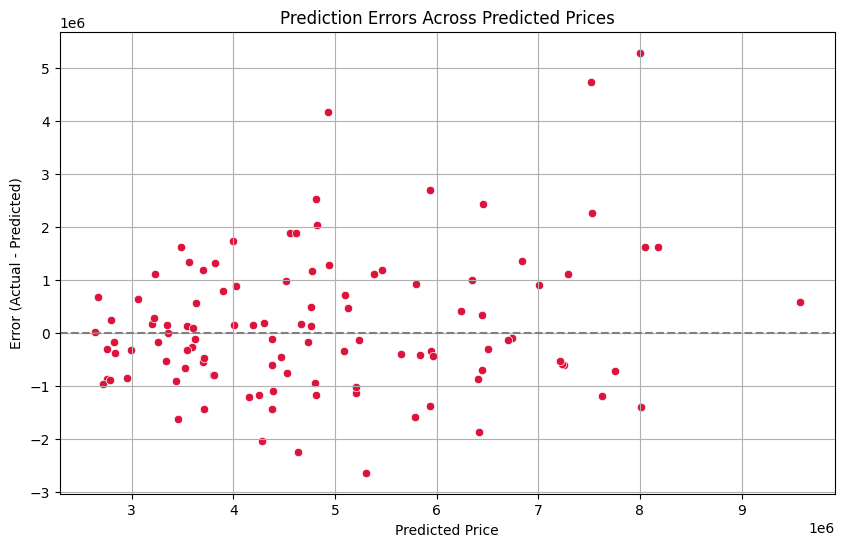

In [21]:
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=errors, color='crimson')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Prediction Errors Across Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()

#### Save Model

In [22]:
joblib.dump(model, "Models/House_Price_Model.pkl")
joblib.dump(scaler, "Models/Scaler.pkl")
print("Model & Scaler Saved")

Model & Scaler Saved


#### Gradio Prediction Function

In [23]:
def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement,
                  hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    
    input_data = [[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement,
                   hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]]
    
    scaler = joblib.load("Models/Scaler.pkl")
    model = joblib.load("Models/House_Price_Model.pkl")
    
    input_scaled = scaler.transform(input_data)
    price = model.predict(input_scaled)[0]
    return f"Estimated Price: ₹{price:,.2f}"

#### Gradio Interface

In [24]:
gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Stories"),
        gr.Radio(["1", "0"], label="Main Road (1=yes, 0=no)"),
        gr.Radio(["1", "0"], label="Guest Room (1=yes, 0=no)"),
        gr.Radio(["1", "0"], label="Basement (1=yes, 0=no)"),
        gr.Radio(["1", "0"], label="Hot Water Heating (1=yes, 0=no)"),
        gr.Radio(["1", "0"], label="Air Conditioning (1=yes, 0=no)"),
        gr.Number(label="Parking"),
        gr.Radio(["1", "0"], label="Preferred Area (1=yes, 0=no)"),
        gr.Dropdown(["0", "1", "2"], label="Furnishing Status (0=furnished, 1=semi-furnished, 2=unfurnished)")
    ],
    outputs="text",
    title="House Price Estimator",
    description="Enter the house features to get estimated price"
).launch()

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
